In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
target_dict={90:'SNIa',67:'SNIa-91bg',
             52:'SNIax',42:'SNII',
             62:'SNIbc',95:'SLSN-I',
             15:'TDE',64:'KN',
             88:'AGN',92:'RRL',
             65:'M-dwarf',16:'EB',
             53:'Mira',6:'Lens-Single',
             994:'PISN', 999:'UNKNOWN', 1:'NON PISN'}
passband_list = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}

## Polynomial model

In [84]:
path="../../plasticc/param_table/Gold_train_10_poly.pkl"
data=pd.read_pickle(path)
data

,object_id,target,0,1,2,3,4,5,6,7,8,9,10,11
0,745,90,0.024734,-4.449324,199.717864,0.016554,-3.527463,200.851958,0.014781,-3.211017,186.664764,0.007986,-2.281782,141.541472
1,1920,90,-0.017271,0.093592,148.011848,-0.030588,1.847712,120.449342,-0.027598,1.760405,102.518101,0.008193,-2.010752,143.660654
2,2103,42,-0.112750,2.106002,121.969068,-0.059112,1.133207,116.172373,-0.103284,2.514793,115.492745,-0.135940,3.109541,111.105160
3,2922,67,0.033929,-5.899421,250.216468,0.059100,-10.116331,411.695898,0.053496,-9.426490,406.481090,0.102135,-12.159712,383.749873
4,3285,42,-0.200922,6.974309,62.071463,-0.151688,5.963471,50.075980,-0.171173,6.789266,47.816082,-0.195050,7.800853,39.554632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,91208745,994,-0.000998,0.285556,73.484746,-0.002123,0.794556,88.381225,-0.002290,1.032646,87.716065,-0.002415,1.019106,123.503379
815,98445976,994,-0.003483,0.429650,54.875893,-0.003718,0.832873,70.715445,-0.006339,1.078931,98.694038,0.018574,-1.556635,116.873312
816,103994558,994,-0.000273,-0.650025,361.006730,-0.003246,1.960380,141.720592,-0.003776,2.404207,103.477772,-0.004057,2.651727,111.454164
817,107011534,994,-0.001348,0.557830,25.041303,-0.002624,1.078852,44.540031,-0.002132,-0.136342,200.754274,0.003141,-1.032413,260.327094


In [85]:
data=pd.read_pickle(path)

data.loc[data['target']!=994,'target']=1#BINARY

A_table=data.loc[:,['object_id','target',0]].rename(columns={0: "A"})
B_table=data.loc[:,['object_id','target',1]].rename(columns={1: "B"})
C_table=data.loc[:,['object_id','target',2]].rename(columns={2: "C"})

for i in range(3):
    A_table=A_table.append(data.loc[:,['object_id','target',3*(i+1)]].rename(columns={3*(i+1): "A"}))
    B_table=B_table.append(data.loc[:,['object_id','target',1+3*(i+1)]].rename(columns={1+3*(i+1): "B"}))
    C_table=C_table.append(data.loc[:,['object_id','target',2+3*(i+1)]].rename(columns={2+3*(i+1): "C"})) 


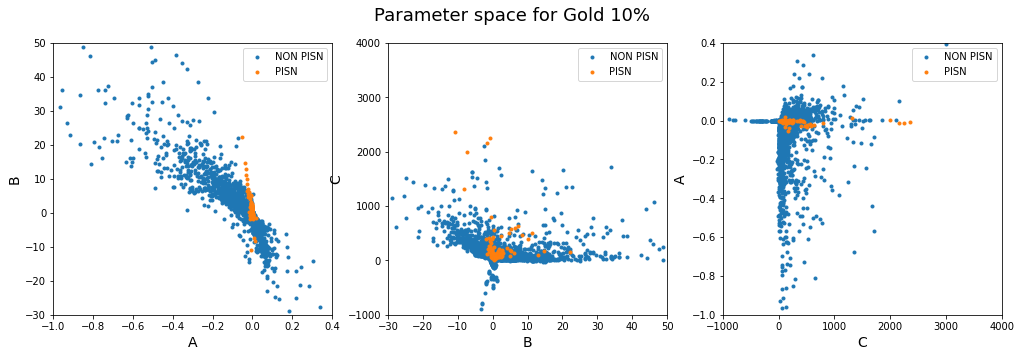

In [86]:
targets=np.unique(A_table['target'])


plt.figure(figsize=(17,5))
plt.suptitle('Parameter space for Gold 10%',fontsize=18)


ax1 = plt.subplot(1,3,1)

for i in targets:
    
    plt.scatter(A_table.loc[A_table['target']==i,'A'],B_table.loc[B_table['target']==i,'B'],marker='.',label=target_dict.get(i))
    plt.xlabel('A',fontsize=14)
    plt.ylabel('B',fontsize=14)
    ax1.set_xlim([-1, 0.4])
    ax1.set_ylim([-30,50])
    plt.legend()


ax2 = plt.subplot(1,3,2)

for i in targets:
    

    plt.scatter(B_table.loc[B_table['target']==i,'B'],C_table.loc[C_table['target']==i,'C'],marker='.',label=target_dict.get(i))
    plt.xlabel('B',fontsize=14)
    plt.ylabel('C',fontsize=14)
    ax2.set_xlim([-30,50])
    ax2.set_ylim([-1000, 4000])
    plt.legend()

    
ax3 = plt.subplot(1,3,3)

for i in targets:    

    
    plt.scatter(C_table.loc[C_table['target']==i,'C'],A_table.loc[A_table['target']==i,'A'],marker='.',label=target_dict.get(i))
    plt.xlabel('C',fontsize=14)
    plt.ylabel('A',fontsize=14)
    ax3.set_xlim([-1000, 4000])
    ax3.set_ylim([-1, 0.4])
    plt.legend()
    
#plt.savefig('../../plasticc/param_table/Space/Space_Gold_10.jpg')

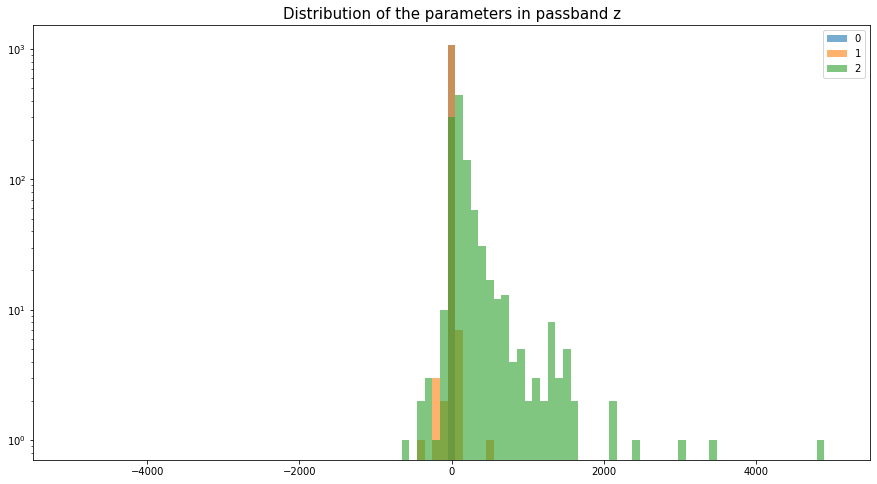

In [14]:
plt.figure(figsize=(15,8));

band=4                                 # <------------
nb_param=3                             # <------------

x = np.linspace(-5000,5000,100)
plt.title('Distribution of the parameters in passband %s'%(passband_list.get(band)),fontsize=15)

for i in range(nb_param):
    plt.hist(data.loc[:,i],bins=x,alpha=0.6,label=i);
plt.yscale('log')
plt.legend()
